In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data from: https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database 
lifting_df = pd.read_csv("Resources/openpowerlifting.csv")
lifting_df.head()

/Users/johnwhendricks/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [3]:
# focus solely on the Open Division
# Open Division is open to anyone of any age or weight class
open_df = lifting_df[lifting_df['Division'] == 'Open'] 
len(open_df)

337927

In [4]:
# new column named "Year"
open_df['Year'] = pd.DatetimeIndex(open_df['Date']).year
open_df.head()

/Users/johnwhendricks/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName,Year
8169,Jan Schnoor,M,SBD,Raw,25.0,24-34,Open,125.3,120+,225.0,...,381.08,554.12,Yes,Germany,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,2018
8170,Frank Hoyer,M,SBD,Raw,37.5,35-39,Open,106.7,120,170.0,...,313.46,457.56,Yes,NaN,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,2018
8171,Joshua Wright,M,SBD,Raw,31.5,24-34,Open,73.9,74,175.0,...,388.41,595.94,Yes,NaN,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,2018
8172,Miguel Martins Dias,M,SBD,Raw,26.5,24-34,Open,72.6,74,180.0,...,335.33,501.95,Yes,NaN,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,2018
8173,Maik Steinfurth,M,SBD,Raw,39.0,35-39,Open,106.8,120,210.0,...,371.74,558.29,Yes,NaN,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,2018


In [5]:
# sort the dates from first competition to most recent competition
open_df = open_df.sort_values('Date')
open_df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName,Year
178579,David Moyer,M,SBD,Wraps,NaN,NaN,Open,56.00,56,NaN,...,438.11,648.04,Yes,NaN,AAU,1964-09-05,USA,PA,The Powerlifting Tournament Of America,1964
178580,Jim Kenyon,M,SBD,Wraps,15.5,16-17,Open,56.00,56,NaN,...,333.12,472.35,Yes,NaN,AAU,1964-09-05,USA,PA,The Powerlifting Tournament Of America,1964
178599,Ed Morliens,M,SBD,Wraps,NaN,NaN,Open,119.29,90+,NaN,...,371.44,544.84,Yes,NaN,AAU,1964-09-05,USA,PA,The Powerlifting Tournament Of America,1964
178598,Wilbur Miller,M,SBD,Wraps,NaN,NaN,Open,165.56,90+,NaN,...,370.39,495.15,Yes,NaN,AAU,1964-09-05,USA,PA,The Powerlifting Tournament Of America,1964
178597,Terence Todd,M,SBD,Wraps,26.0,24-34,Open,143.79,90+,NaN,...,425.29,603.71,Yes,NaN,AAU,1964-09-05,USA,PA,The Powerlifting Tournament Of America,1964


In [6]:
# means from 1964 - 2019
open_means = open_df.groupby('Year').mean()
open_means.head()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
Year,,,,,,,,,,,,,,,,,,,,,
1964,22.666667,81.982857,NaN,NaN,NaN,NaN,190.294286,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,238.461429,563.210952,398.752381,400.861429,385.239524,576.638095
1965,28.100000,77.019744,264.900000,65.616667,71.670000,NaN,200.173864,201.845000,76.956667,-46.176000,...,238.912857,168.925000,-18.099000,NaN,238.311591,579.995455,403.503158,405.566316,390.394474,589.483421
1966,26.866667,77.442500,149.006000,69.683000,111.131429,NaN,210.652368,123.226667,75.544545,-67.132222,...,174.563125,-11.602105,-118.894706,NaN,243.929459,603.707568,412.776250,418.029063,399.361562,607.359375
1967,26.562500,79.430476,209.030000,177.525000,47.165000,NaN,214.169444,56.246000,11.917273,-9.630000,...,263.267000,127.218000,-13.253529,NaN,252.292571,617.002000,428.559412,432.971471,414.320882,631.924412
1968,26.111111,84.729524,192.158182,93.213750,-84.844000,NaN,209.647500,-24.381250,10.349091,-80.426923,...,226.796316,30.175789,-125.940870,NaN,240.410943,594.404423,409.646923,411.847500,395.718654,601.271154


Text(0.5, 1.0, 'Average Age (Open Division)')

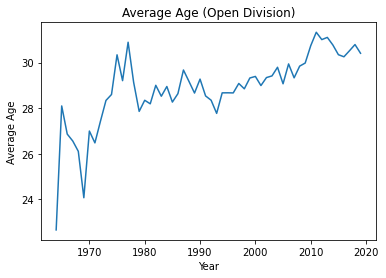

In [12]:
plt.plot(open_means.index, open_means['Age'])
plt.xlabel("Year")
plt.ylabel('Average Age')
plt.title("Average Age (Open Division)")

Text(0.5, 1.0, 'Average Body Weight (Open Division)')

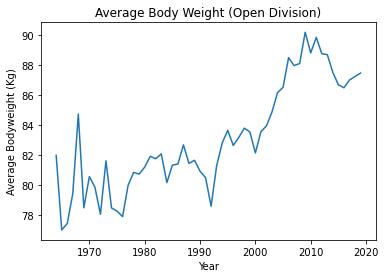

In [13]:
plt.plot(open_means.index, open_means['BodyweightKg'])
plt.xlabel("Year")
plt.ylabel('Average Bodyweight (Kg)')
plt.title('Average Body Weight (Open Division)')

Text(0.5, 1.0, 'Average Squat (Open Division)')

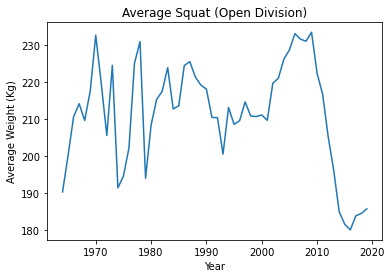

In [15]:
plt.plot(open_means.index, open_means['Best3SquatKg'])
plt.xlabel("Year")
plt.ylabel('Average Weight (Kg)')
plt.title('Average Squat (Open Division)')

Text(0.5, 1.0, 'Average Bench Press (Open Division)')

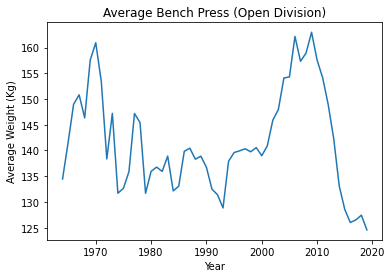

In [16]:
plt.plot(open_means.index, open_means['Best3BenchKg'])
plt.xlabel("Year")
plt.ylabel('Average Weight (Kg)')
plt.title('Average Bench Press (Open Division)')

Text(0.5, 1.0, 'Average Deadlift (Open Division)')

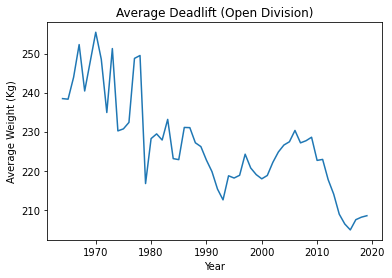

In [17]:
plt.plot(open_means.index, open_means['Best3DeadliftKg'])
plt.xlabel("Year")
plt.ylabel('Average Weight (Kg)')
plt.title('Average Deadlift (Open Division)')

Text(0.5, 1.0, 'Average Total Weight Lifted (Open Division)')

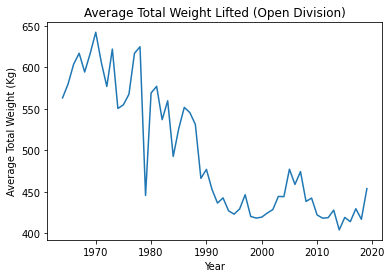

In [18]:
plt.plot(open_means.index, open_means['TotalKg'])
plt.xlabel("Year")
plt.ylabel('Average Total Weight (Kg)')
plt.title('Average Total Weight Lifted (Open Division)')

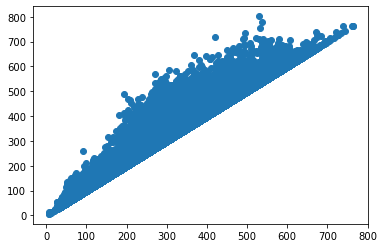

In [133]:
plt.scatter(open_df['Wilks'], open_df['McCulloch'])

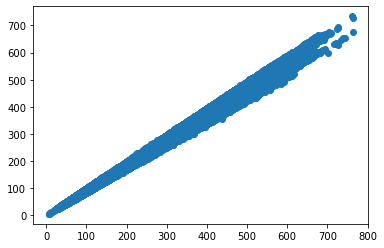

In [134]:
plt.scatter(open_df['Wilks'], open_df['Glossbrenner'])

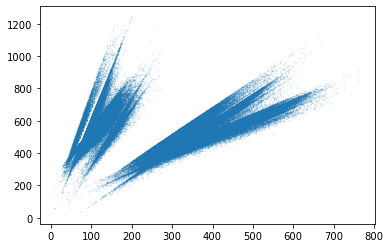

In [135]:
plt.scatter(open_df['Wilks'], open_df['IPFPoints'], s = 0.1, alpha = 0.2)

<BarContainer object of 5 artists>

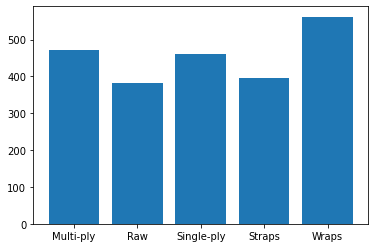

In [19]:
x = open_df['Equipment'].unique()
height = open_df.groupby('Equipment').mean()['TotalKg']

x = height.index
plt.bar(x, height = height.values)

<BarContainer object of 5 artists>

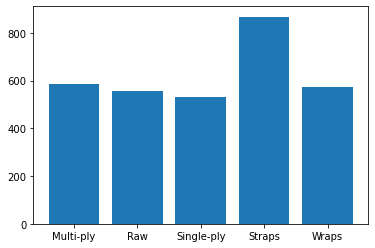

In [20]:
x = open_df['Equipment'].unique()
height = open_df.groupby('Equipment').mean()['IPFPoints']

x = height.index

plt.bar(x, height = height.values)

<BarContainer object of 5 artists>

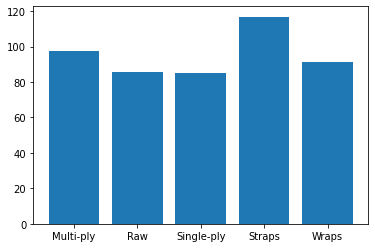

In [21]:
x = open_df['Equipment'].unique()
height = open_df.groupby('Equipment').mean()['BodyweightKg']

x = height.index

plt.bar(x, height = height.values)

<BarContainer object of 5 artists>

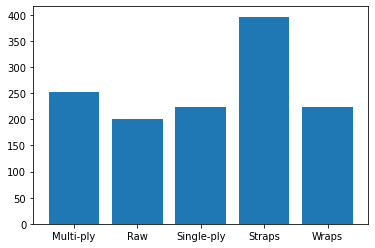

In [22]:
x = open_df['Equipment'].unique()
height = open_df.groupby('Equipment').mean()['Best3DeadliftKg']

x = height.index

plt.bar(x, height = height.values)

<BarContainer object of 5 artists>

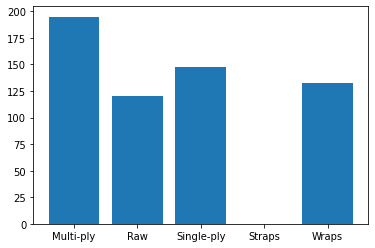

In [23]:
x = open_df['Equipment'].unique()
height = open_df.groupby('Equipment').mean()['Best3BenchKg']

x = height.index

plt.bar(x, height = height.values)

<BarContainer object of 5 artists>

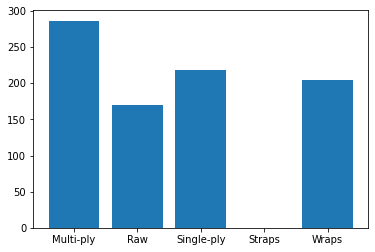

In [24]:
x = open_df['Equipment'].unique()
height = open_df.groupby('Equipment').mean()['Best3SquatKg']

x = height.index

plt.bar(x, height = height.values)

In [26]:
# group data by both the year and gender and count number of rows
fm_yearly = open_df.groupby(['Year','Sex']).count()
fm_yearly.tail()

Name  Event  Equipment    Age  AgeClass  Division  BodyweightKg  \
Year Sex                                                                     
2017 M    20749  20749      20749  17516     17572     20749         20710   
2018 F    11941  11941      11941   9792      9806     11941         11915   
     M    25835  25835      25835  21257     21342     25835         25782   
2019 F     2621   2621       2621   2258      2259      2621          2621   
     M     5068   5068       5068   4440      4449      5068          5067   

          WeightClassKg  Squat1Kg  Squat2Kg  ...  McCulloch  Glossbrenner  \
Year Sex                                     ...                            
2017 M            20745      6157      6076  ...      19732         19732   
2018 F            11818      3778      3762  ...      11568         11568   
     M            25649      7401      7325  ...      24490         24490   
2019 F             2621       753       750  ...       2538          2538   
     M             5068      1378      1361  ...       4825          4825   

          IPFPoints  Tested  Country  Federation   Date  MeetCountry  \
Year Sex                                                               
2017 M        19264   11557     5938       20749  20749        20749   
2018 F        11329    7533     3604       11941  11941        11941   
     M        23801   14538     8205       25835  25835        25835   
2019 F         2494    1520      422        2621   2621         2621   
     M         4716    2806      853        5068   5068         5068   

          MeetState  MeetName  
Year Sex                       
2017 M        13343     20749  
2018 F         8272     11941  
     M        16296     25835  
2019 F         2234      2621  
     M         4031      5068  

[5 rows x 36 columns]

In [27]:
# make dataframe, a, that resets the index of fm_yearly such that men and women are grouped separately for each year
a = fm_yearly.loc[(pd.to_datetime('1964',format="%Y").year,'M') : (pd.to_datetime('2019',format="%Y").year,'M'),'Name'].reset_index(level=[0,1]).sort_values('Sex')

In [28]:
# make data frame that only has women
f_df = a.head(42)
f_df = f_df.sort_values('Year')
f_df.head()

,Year,Sex,Name
11,1975,F,8
16,1979,F,60
18,1980,F,232
20,1981,F,343
22,1982,F,532


In [29]:
# make dataframe that only consists of men
m_df = a.iloc[42:,:]
m_df = m_df.sort_values('Year')
m_df.head()

,Year,Sex,Name
0,1964,M,21
1,1965,M,45
2,1966,M,41
3,1967,M,44
4,1968,M,63


Text(0.5, 1.0, 'Number of Female Participants (Open Division)')

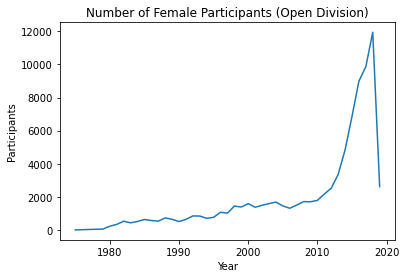

In [31]:
plt.plot(f_df['Year'], f_df['Name'])
plt.xlabel('Year')
plt.ylabel('Participants')
plt.title('Number of Female Participants (Open Division)')

Text(0.5, 1.0, 'Number of Male Participants (Open Division)')

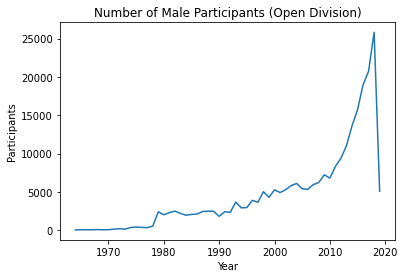

In [32]:
plt.plot(m_df['Year'], m_df['Name'])
plt.xlabel('Year')
plt.ylabel('Participants')
plt.title('Number of Male Participants (Open Division)')

In [148]:
m_df['Name'].values

array([   21,    45,    41,    44,    63,    41,    44,   128,   184,
         121,   337,   391,   354,   313,   512,  2383,  2007,  2280,
        2476,  2178,  1942,  2046,  2096,  2422,  2465,  2452,  1788,
        2393,  2319,  3656,  2899,  2945,  3888,  3629,  5012,  4285,
        5259,  4903,  5255,  5814,  6089,  5402,  5315,  5934,  6210,
        7218,  6784,  8305,  9375, 11017, 13592, 15715, 18964, 20749,
       25835,  5068])

In [33]:
from datetime import datetime

#focus on dates from 1980 to 2019
m_df_after_1980 = m_df[m_df['Year'] >= datetime.strptime('1980','%Y').year]
f_df_after_1980 = f_df[f_df['Year'] >= datetime.strptime('1980','%Y').year]



In [35]:
# total number of participants for each year
total_count_after_1980 = [sum(x) for x in zip(m_df_after_1980['Name'], f_df_after_1980['Name'])]

In [36]:
# percentage of female and male participants for each year
f_percent = [round(100 * i / j,2) for i, j in zip(f_df_after_1980['Name'], total_count_after_1980)]
m_percent = [round(100* i / j,2) for i, j in zip(m_df_after_1980['Name'], total_count_after_1980)]

In [37]:
years = np.arange(1980, 2020)

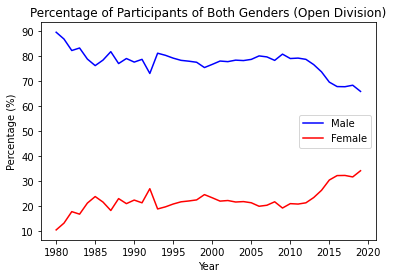

In [44]:
fig, ax = plt.subplots()
ax.plot(years, m_percent, label = "Male", color = 'blue')
ax.plot(years,f_percent, label = "Female", color = 'red')
ax.set_title('Percentage of Participants of Both Genders (Open Division)')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage (%)')
ax.legend()

In [45]:
# group by year and Equipment used
equip_yearly = open_df.groupby(['Year','Equipment']).count()
equip_yearly.head()

Name  Sex  Event  Age  AgeClass  Division  BodyweightKg  \
Year Equipment                                                            
1964 Wraps        21   21     21    3         3        21            21   
1965 Raw           3    3      3    2         2         3             3   
     Wraps        42   42     42    8         8        42            36   
1966 Wraps        41   41     41   15        15        41            36   
1967 Raw           1    1      1    1         1         1             1   

                WeightClassKg  Squat1Kg  Squat2Kg  ...  McCulloch  \
Year Equipment                                     ...              
1964 Wraps                 21         0         0  ...         21   
1965 Raw                    3         1         1  ...          3   
     Wraps                 42         2         2  ...         35   
1966 Wraps                 41        10        10  ...         32   
1967 Raw                    1         1         1  ...          1   

                Glossbrenner  IPFPoints  Tested  Country  Federation  Date  \
Year Equipment                                                               
1964 Wraps                21         21      21        1          21    21   
1965 Raw                   3          3       0        1           3     3   
     Wraps                35         35       0        5          42    42   
1966 Wraps                32         32       0       10          41    41   
1967 Raw                   1          1       0        1           1     1   

                MeetCountry  MeetState  MeetName  
Year Equipment                                    
1964 Wraps               21         21        21  
1965 Raw                  3          3         3  
     Wraps               42         42        42  
1966 Wraps               41         41        41  
1967 Raw                  1          1         1  

[5 rows x 36 columns]

In [46]:
# reset the index
b= equip_yearly.loc[(pd.to_datetime('1964',format="%Y").year,'Wraps') : (pd.to_datetime('2019',format="%Y").year,'Wraps'),'Name'].reset_index(level=[0,1])
b.head()

,Year,Equipment,Name
0,1964,Wraps,21
1,1965,Raw,3
2,1965,Wraps,42
3,1966,Wraps,41
4,1967,Raw,1


In [47]:
start_date = pd.to_datetime('1964',format="%Y").year
end_date = pd.to_datetime('2019',format="%Y").year
years = np.arange(start_date, end_date)
years = np.append(years,end_date)
equipment_list = open_df['Equipment'].unique()

# set any missing equipment to value 0
for year in years:
    for equipment in equipment_list:
        if equipment not in equip_yearly.loc[year].index.tolist():
            b.loc[len(b)] = [year,equipment,0]

b= b.sort_values('Year')


In [48]:
wraps = b[b['Equipment']=='Wraps']['Name']
straps = b[b['Equipment']=='Straps']['Name']
raw = b[b['Equipment'] == 'Raw']['Name']
multi = b[b['Equipment']=='Multi-ply']['Name']
single = b[b['Equipment']=='Single-ply']['Name']

In [49]:
total_count = [sum(x) for x in zip(wraps.values,straps.values,raw.values,multi.values,single.values)]

In [50]:
# calculate the percentage of participants who used each equipment per year
wraps_percent = [round(i/j*100,2) for i,j in zip(wraps, total_count)]
straps_percent = [round(i/j*100,2) for i,j in zip(straps, total_count)]
raw_percent = [round(i/j*100,2) for i,j in zip(raw, total_count)]
multi_percent = [round(i/j*100,2) for i,j in zip(multi, total_count)]
single_percent = [round(i/j*100,2) for i,j in zip(single, total_count)]

Text(0.5, 1.0, 'Usage of Wraps from 1964-1980')

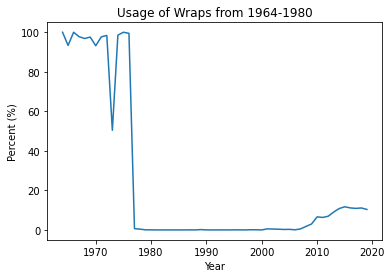

In [51]:
plt.plot(years, wraps_percent)
plt.xlabel('Year')
plt.ylabel('Percent (%)')
plt.title('Usage of Wraps from 1964-1980')

Text(0.5, 1.0, 'Usage of Straps from 1964-1980')

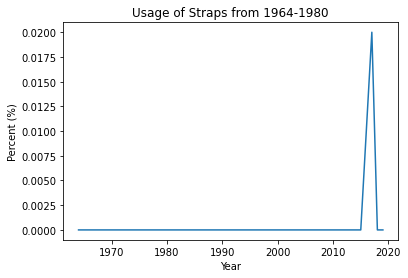

In [52]:
plt.plot(years, straps_percent)
plt.xlabel('Year')
plt.ylabel('Percent (%)')
plt.title('Usage of Straps from 1964-1980')

Text(0.5, 1.0, 'Percentage of Those Choosing Raw from 1964-1980')

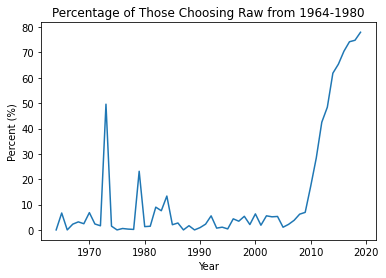

In [53]:
plt.plot(years, raw_percent)
plt.xlabel('Year')
plt.ylabel('Percent (%)')
plt.title('Percentage of Those Choosing Raw from 1964-1980')

Text(0.5, 1.0, 'Usage of Multi-Ply from 1964-1980')

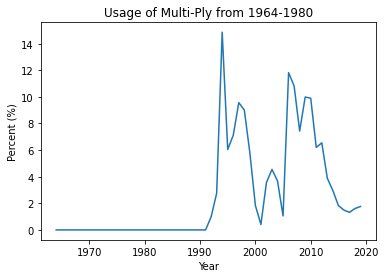

In [54]:
plt.plot(years, multi_percent)
plt.xlabel('Year')
plt.ylabel('Percent (%)')
plt.title('Usage of Multi-Ply from 1964-1980')

Text(0.5, 1.0, 'Usage of Single-Ply from 1964-1980')

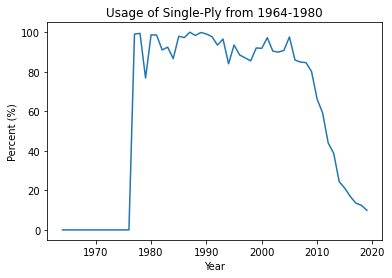

In [55]:
plt.plot(years, single_percent)
plt.xlabel('Year')
plt.ylabel('Percent (%)')
plt.title('Usage of Single-Ply from 1964-1980')

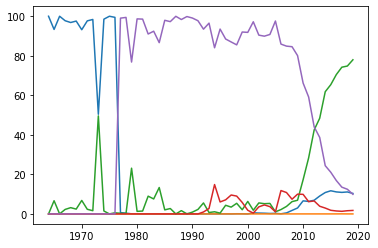

In [57]:
# plotting all equipment together is too confusing
fig, ax = plt.subplots()
ax.plot(years, wraps_percent)
ax.plot(years, straps_percent)
ax.plot(years, raw_percent)
ax.plot(years, multi_percent)
ax.plot(years, single_percent)